# Bank Customer Churn Prediction
### The dataset can be downloaded from here: https://www.kaggle.com/datasets/shubhammeshram579/bank-customer-churn-prediction

The dataset includes the following attributes:

* Customer ID: A unique identifier for each customer
* Surname: The customer's surname or last name
* Credit Score: A numerical value representing the customer's credit score
* Geography: The country where the customer resides (France, Spain or Germany)
* Gender: The customer's gender (Male or Female)
* Age: The customer's age.
* Tenure: The number of years the customer has been with the bank
* Balance: The customer's account balance
* NumOfProducts: The number of bank products the customer uses (e.g., savings account, credit card)
* HasCrCard: Whether the customer has a credit card (1 = yes, 0 = no)
* IsActiveMember: Whether the customer is an active member (1 = yes, 0 = no)
* EstimatedSalary: The estimated salary of the customer
* Exited: Whether the customer has churned (1 = yes, 0 = no)


In [1]:
from google.colab import files

uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [3]:
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists
mv: cannot stat 'kaggle.json': No such file or directory


In [4]:
!kaggle datasets download -d shantanudhakadd/bank-customer-churn-prediction

  0% 0.00/262k [00:00<?, ?B/s]
100% 262k/262k [00:00<00:00, 96.5MB/s]


In [221]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 70.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 65.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 20.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 74.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 67.8 MB/s e

## Getting the data

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.combine import SMOTETomek
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [95]:
import zipfile

zip_ref = zipfile.ZipFile("/content/bank-customer-churn-prediction.zip")
zip_ref.extractall()
zip_ref.close()

In [5]:
df = pd.read_csv("/content/Churn_Modelling.csv")
len(df)

10000

In [137]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Exploratory Data Analysis

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [139]:
df.shape

(10000, 14)

In [140]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [141]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [142]:
# Removing the non-related columns.
non_related_col = ["RowNumber", "CustomerId", "Surname"]

df = df.drop(non_related_col, axis=1)

In [143]:
df.shape

(10000, 11)

In [144]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Text(0.5, 1.0, 'Distribution of Credit Score')

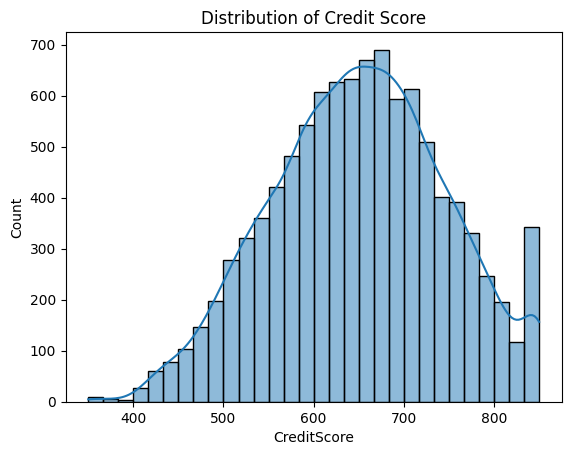

In [145]:
sns.histplot(data=df, x='CreditScore', bins=30, kde=True);
plt.title("Distribution of Credit Score")

In [146]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [147]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

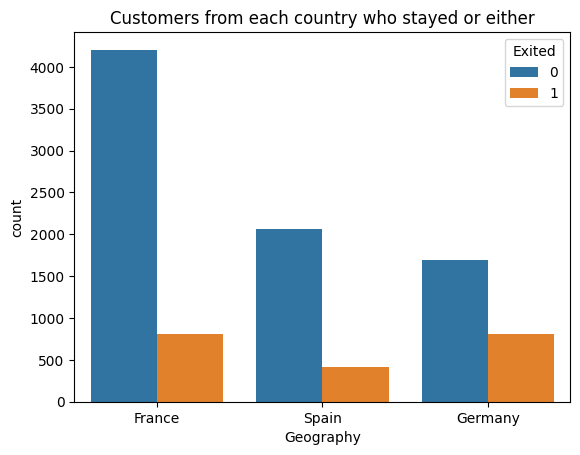

In [148]:
sns.countplot(data=df, x="Geography", hue="Exited")
plt.title("Customers from each country who stayed or either");

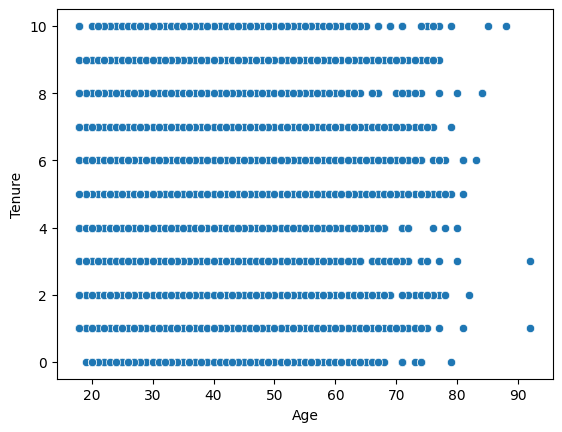

In [149]:
sns.scatterplot(data=df, x="Age", y="Tenure");

In [150]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


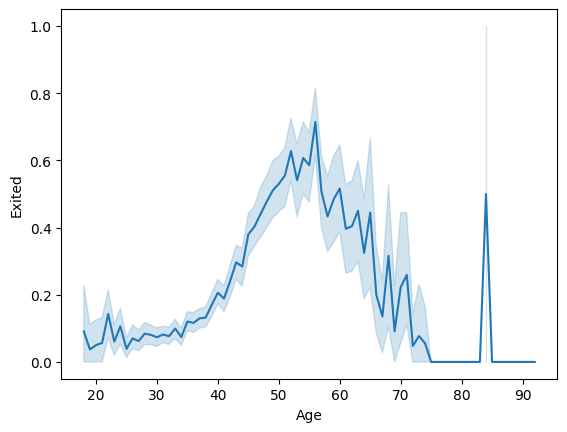

In [151]:
sns.lineplot(data=df, x="Age", y="Exited");

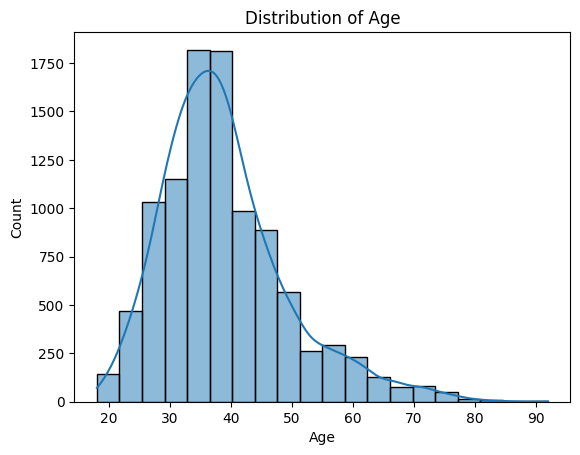

In [152]:
sns.histplot(data=df, x='Age', bins=20, kde=True);
plt.title("Distribution of Age");

Observation: The percentage of people above 75 years of Age is quite low.

In [153]:
# Removing those people with age greater than 75.
df = df[df['Age'] < 75]

In [159]:
df['Geography'].value_counts()

France     4986
Germany    2496
Spain      2464
Name: Geography, dtype: int64

In [160]:
df['Exited'].value_counts()

0    7910
1    2036
Name: Exited, dtype: int64

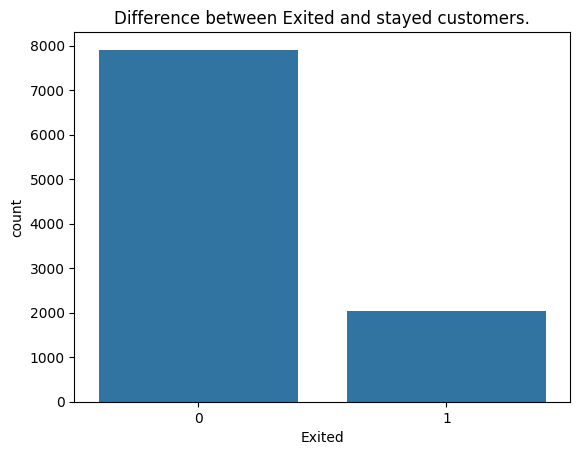

In [164]:
sns.countplot(data=df, x='Exited')
plt.title("Difference between Exited and stayed customers.");

Observation: The Dependent feature is imbalanced.

In [154]:
correlation_matrix = df.corr()
correlation_matrix

<ipython-input-154-f471181e404f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.007359,0.000856,0.006659,0.011727,-0.005479,0.024647,-0.000549,-0.026172
Age,-0.007359,1.000000,-0.013687,0.034087,-0.030408,-0.010390,0.071607,-0.007518,0.307139
Tenure,0.000856,-0.013687,1.000000,-0.012827,0.014245,0.021847,-0.028929,0.007973,-0.013883
Balance,0.006659,0.034087,-0.012827,1.000000,-0.303211,-0.014588,-0.008999,0.012959,0.118311
NumOfProducts,0.011727,-0.030408,0.014245,-0.303211,1.000000,0.002908,0.009369,0.014702,-0.047976
HasCrCard,-0.005479,-0.010390,0.021847,-0.014588,0.002908,1.000000,-0.011402,-0.009383,-0.007014
IsActiveMember,0.024647,0.071607,-0.028929,-0.008999,0.009369,-0.011402,1.000000,-0.010975,-0.154149
EstimatedSalary,-0.000549,-0.007518,0.007973,0.012959,0.014702,-0.009383,-0.010975,1.000000,0.011725
Exited,-0.026172,0.307139,-0.013883,0.118311,-0.047976,-0.007014,-0.154149,0.011725,1.000000


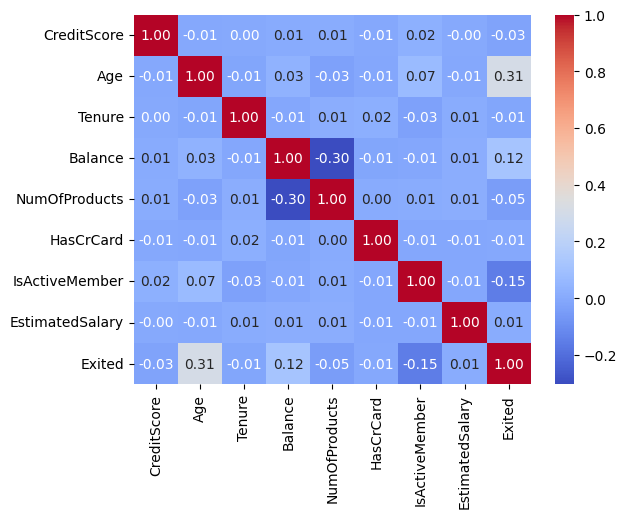

In [155]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show();

In [161]:
# Removing less correlated columns
low_correlated_col = ['EstimatedSalary', 'HasCrCard', 'Tenure']

df = df.drop(low_correlated_col, axis=1)

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9946 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CreditScore     9946 non-null   int64  
 1   Geography       9946 non-null   object 
 2   Gender          9946 non-null   object 
 3   Age             9946 non-null   int64  
 4   Balance         9946 non-null   float64
 5   NumOfProducts   9946 non-null   int64  
 6   IsActiveMember  9946 non-null   int64  
 7   Exited          9946 non-null   int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 699.3+ KB


## Preprocessing the data

In [166]:
x = df.drop('Exited', axis=1)
y = df['Exited']

In [174]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

len(x_train), len(x_test), len(y_train), len(y_test)

(7956, 1990, 7956, 1990)

In [177]:
y_train.value_counts()

0    6321
1    1635
Name: Exited, dtype: int64

In [176]:
x_train.shape, y_train.shape

((7956, 7), (7956,))

In [191]:
categorical_columns = ['Geography', 'Gender']

numerical_columns = []

for col in x:
  if col in categorical_columns:
    pass
  else:
    numerical_columns.append(col)

In [192]:
numerical_columns

['CreditScore', 'Age', 'Balance', 'NumOfProducts', 'IsActiveMember']

In [193]:
cat_pipeline = Pipeline(
    steps=[
        ("one_hot_encoder",OneHotEncoder()),
        ("scaler",StandardScaler(with_mean=False))
    ]
)

num_pipeline = Pipeline(
    steps=[
        ("scaler",StandardScaler(with_mean=False))
    ]
)

preprocessor = ColumnTransformer(
    [
        ("cat_pipeline", cat_pipeline, categorical_columns),
         ("num_pipeline", num_pipeline, numerical_columns)
    ]
)

In [194]:
x_train_processed = preprocessor.fit_transform(x_train)
x_test_processed = preprocessor.transform(x_test)

In [195]:
# Balancing the dependent feature.
smk = SMOTETomek(random_state=42)
x_bal, y_bal = smk.fit_resample(x_train_processed, y_train)

In [196]:
x_bal.shape, y_bal.shape

((11966, 10), (11966,))

## Creating a model

In [211]:
def accuracy(x_test, y_test, model):
  preds = model.predict(x_test)

  accuracy = accuracy_score(y_test, preds)
  return accuracy

In [212]:
def create_model(x_train=x_bal, y_train=y_bal, x_test=x_test_processed, y_test=y_test):
  xg_model = XGBClassifier()
  lr_model = LogisticRegression()
  rf_model = RandomForestClassifier()

  xg_model.fit(x_train, y_train)
  lr_model.fit(x_train, y_train)
  rf_model.fit(x_train, y_train)

  model_dict = {
      "xgboost": accuracy(x_test, y_test, xg_model),
      "logistic reg": accuracy(x_test, y_test, lr_model),
      "random forest": accuracy(x_test, y_test, rf_model)
  }
  return model_dict

In [215]:
acc = create_model()
acc

{'xgboost': 0.828140703517588,
 'logistic reg': 0.721608040201005,
 'random forest': 0.8306532663316583}

In [220]:
result = pd.DataFrame(data=list(acc.items()), columns=['Model', 'Accuracy'])
result = result.sort_values(by='Accuracy', ascending=False)

result

,Model,Accuracy
2,random forest,0.830653
0,xgboost,0.828141
1,logistic reg,0.721608


## Experimentation

In [2]:
import pycaret
from pycaret.classification import *

In [7]:
s = setup(df, target='Exited', session_id=123,
          ignore_features=["RowNumber", "CustomerId", "Surname", "EstimatedSalary", "HasCrCard", "Tenure"],
          experiment_name='churn1')

,Description,Value
0,Session id,123
1,Target,Exited
2,Target type,Binary
3,Original data shape,"(10000, 14)"
4,Transformed data shape,"(10000, 10)"
5,Transformed train set shape,"(7000, 10)"
6,Transformed test set shape,"(3000, 10)"
7,Ignore features,6
8,Ordinal features,1
9,Numeric features,5


In [8]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8627,0.8626,0.4671,0.7706,0.5809,0.5046,0.5277,0.8660
lightgbm,Light Gradient Boosting Machine,0.8593,0.8489,0.4952,0.7294,0.5891,0.5079,0.5223,1.0920
rf,Random Forest Classifier,0.8554,0.8330,0.4839,0.7154,0.5767,0.4935,0.5076,1.1310
ada,Ada Boost Classifier,0.8544,0.8431,0.4622,0.7262,0.5640,0.4818,0.5000,0.4070
xgboost,Extreme Gradient Boosting,0.8501,0.8330,0.4889,0.6882,0.5707,0.4831,0.4941,0.4880
et,Extra Trees Classifier,0.8443,0.8252,0.4783,0.6638,0.5556,0.4643,0.4736,1.3230
lda,Linear Discriminant Analysis,0.8110,0.7727,0.2518,0.5849,0.3504,0.2604,0.2926,0.1100
ridge,Ridge Classifier,0.8083,0.0000,0.1339,0.6428,0.2208,0.1622,0.2286,0.1120
dummy,Dummy Classifier,0.7963,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0980
lr,Logistic Regression,0.7913,0.6879,0.0869,0.4159,0.1417,0.0813,0.1125,1.1000


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [9]:
tuned_model = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8600,0.8681,0.3944,0.8235,0.5333,0.4628,0.5063
1,0.8643,0.8905,0.3662,0.9123,0.5226,0.4598,0.5253
2,0.8471,0.8592,0.3592,0.7612,0.4880,0.4115,0.4517
3,0.8657,0.8825,0.4155,0.8429,0.5566,0.4880,0.5305
4,0.8571,0.8868,0.3916,0.8116,0.5283,0.4560,0.4981
5,0.8643,0.8688,0.3706,0.9138,0.5274,0.4642,0.5289
6,0.8629,0.8363,0.3706,0.8983,0.5248,0.4604,0.5222
7,0.8514,0.8254,0.3566,0.8095,0.4951,0.4231,0.4721
8,0.8571,0.8404,0.3566,0.8644,0.5050,0.4379,0.4967


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [10]:
print(tuned_model)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [11]:
engineered_model = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8714,0.8434,0.5423,0.7549,0.6311,0.5558,0.5670
1,0.8571,0.8483,0.5000,0.7100,0.5868,0.5035,0.5149
2,0.8471,0.8444,0.4577,0.6842,0.5485,0.4608,0.4743
3,0.8657,0.8487,0.5352,0.7308,0.6179,0.5388,0.5484
4,0.8571,0.8763,0.5105,0.7087,0.5935,0.5096,0.5197
5,0.8600,0.8434,0.4755,0.7473,0.5812,0.5021,0.5206
6,0.8714,0.8108,0.4755,0.8193,0.6018,0.5315,0.5595
7,0.8271,0.8005,0.4126,0.6146,0.4937,0.3943,0.4057
8,0.8557,0.8138,0.4895,0.7143,0.5809,0.4974,0.5104


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [12]:
tuned_model = tune_model(engineered_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8557,0.8377,0.5070,0.6990,0.5878,0.5030,0.5125
1,0.8614,0.8587,0.5141,0.7228,0.6008,0.5199,0.5309
2,0.8500,0.8419,0.4085,0.7342,0.5249,0.4443,0.4713
3,0.8529,0.8636,0.4296,0.7349,0.5422,0.4617,0.4853
4,0.8557,0.8518,0.4126,0.7763,0.5388,0.4626,0.4951
5,0.8471,0.8614,0.3497,0.7812,0.4831,0.4084,0.4540
6,0.8571,0.8261,0.4336,0.7654,0.5536,0.4762,0.5035
7,0.8386,0.7943,0.4476,0.6531,0.5311,0.4377,0.4491
8,0.8429,0.8242,0.4406,0.6774,0.5339,0.4445,0.4593


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


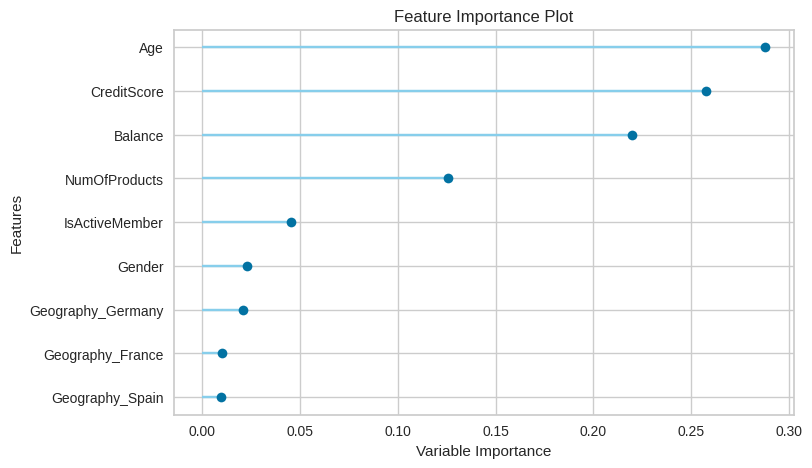

In [13]:
plot_model(tuned_model, plot='feature')

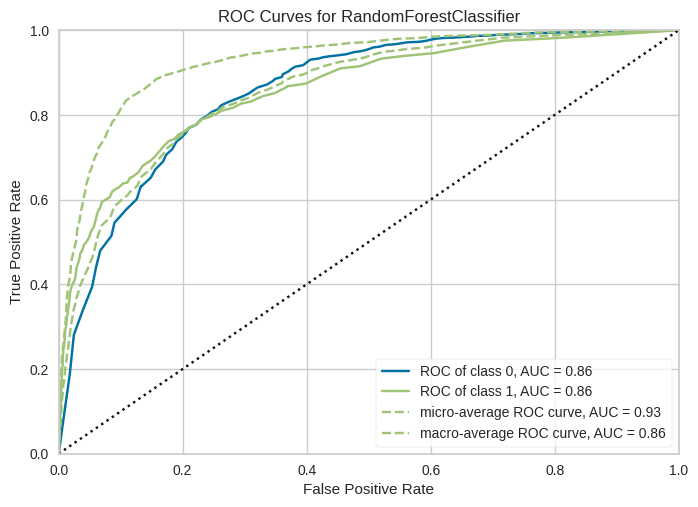

In [14]:
plot_model(tuned_model, plot='auc')

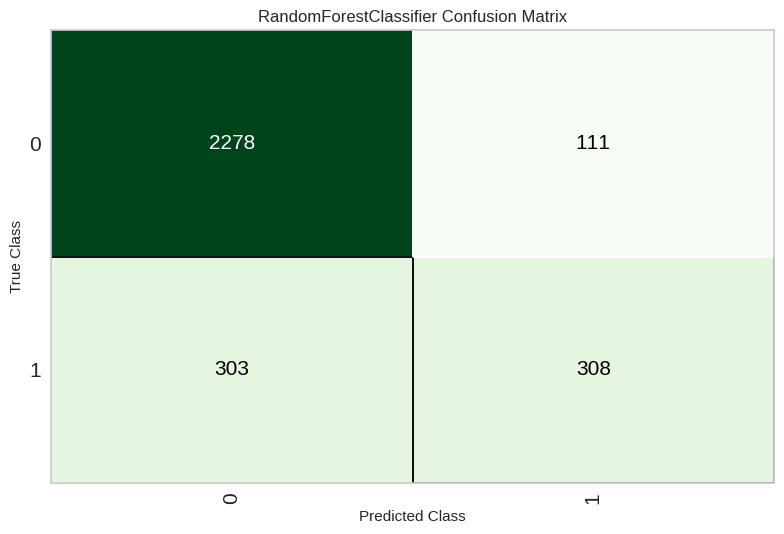

In [15]:
plot_model(tuned_model, plot='confusion_matrix')

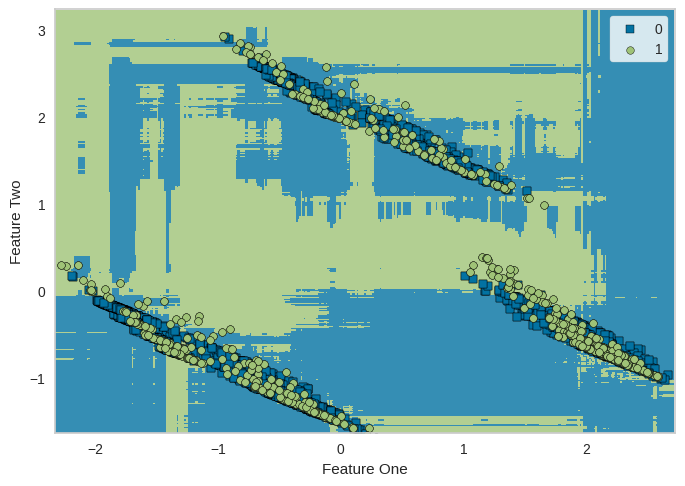

In [16]:
plot_model(tuned_model, plot='boundary')

In [17]:
save_model(tuned_model, 'output\model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['CreditScore', 'Age', 'Balance',
                                              'NumOfProducts',
                                              'IsActiveMember'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               verbose='deprecated'))),
                 ('categorical_imputer'...
                  RandomForestClassifier(